## Library

In [1]:
!nvidia-smi

Fri Oct 29 05:49:03 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  On   | 00000000:00:05.0 Off |                  Off |
| N/A   37C    P0    59W / 300W |   1319MiB / 32480MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [4]:
import cv2
import torch
import os
import random
import math
import glob 
import pathlib
import csv, PIL
import torch
import torchvision
import pydicom
from os import listdir
from PIL import Image
from tqdm import tqdm 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pylab as pylab
import matplotlib.image as mpimg
import seaborn as sns

## 00 Pathing

In [6]:
%pwd

'/home/Sean/Project/iRail_US'

In [18]:
basepath = '/home/Sean/Project/iRail_US'
img_path = basepath + '/Data/Dataset_BUSI_with_GT'
print(os.listdir(img_path))

['normal', 'malignant', 'benign']


In [31]:
train_img  =  glob.glob(img_path+os.sep+"/*/*.png")
normal_path = img_path + '/normal' 
malignant_path = img_path + '/malignant' 
benign_path = img_path + '/benign' 

normal_img  =  glob.glob(normal_path+os.sep+"/*.png")
malignant_img  =  glob.glob(malignant_path+os.sep+"/*.png")
benign_img  =  glob.glob(benign_path+os.sep+"/*.png")

print(f"The total number of the Data: {len(train_img)}")
print(f"The number of the normal Data: {len(normal_img)} \nThe number of the malignant Data: {len(malignant_img)} \nThe number of the benign Data: {len(benign_img)}")

The total number of the Data: 798
The number of the normal Data: 133 
The number of the malignant Data: 211 
The number of the benign Data: 454


#### Need to  remove __mask.png__ data from the data list

In [45]:
m_mask_img  =  glob.glob(malignant_path+os.sep+"/*mask*.png")
b_mask_img  =  glob.glob(benign_path+os.sep+"/*mask*.png")

malignant_img_ = list(set(malignant_img) - set(m_mask_img))
benign_img_ = list(set(benign_img) - set(b_mask_img))

print(f"The number of the malignant raw Data: {len(malignant_img_)} \nThe number of the malignant mask Data: {len(m_mask_img)}")
print(f"The number of the benign raw Data: {len(benign_img_)} \nThe number of the benign mask Data: {len(b_mask_img)}")

The number of the malignant raw Data: 210 
The number of the malignant mask Data: 1
The number of the benign raw Data: 437 
The number of the benign mask Data: 17


Type of the random image: <class 'numpy.ndarray'> 
Shape of the random image: '(574, 669, 3), 
Path : /home/Sean/Project/iRail_US/Data/Dataset_BUSI_with_GT/normal/normal (131).png


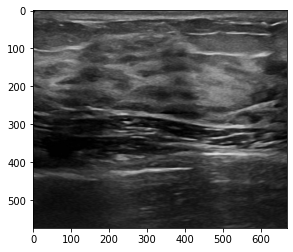

In [36]:
rand_path = random.choice(train_img)
rand_img = mpimg.imread(rand_path)
plt.imshow(rand_img)

print( f"Type of the random image: {type(rand_img)} \nShape of the random image: '{rand_img.shape}, \nPath : {rand_path}")

## 01 Data to CSV

In [49]:
tot_img = list(set(train_img) - set(m_mask_img) - set(b_mask_img))
print(len(tot_img))

780


In [51]:
tot_img[:1]

['/home/Sean/Project/iRail_US/Data/Dataset_BUSI_with_GT/benign/benign (138).png']

In [58]:
imgs_path = []

for i in range(len(tot_img)):
    imgs_path.append(tot_img[i])
    imgs_path.sort()

print('The number of the files are : {},\nThe first file is : {}, \nThe last file is : {}'.format(len(imgs_path),imgs_path[0], imgs_path[-1] ))

The number of the files are : 780,
The first file is : /home/Sean/Project/iRail_US/Data/Dataset_BUSI_with_GT/benign/benign (1).png, 
The last file is : /home/Sean/Project/iRail_US/Data/Dataset_BUSI_with_GT/normal/normal (99).png


In [69]:
class_path = []

for i in range(len(tot_img)):
    class_path.append(tot_img[i].split('Dataset_BUSI_with_GT/')[-1].split('/')[0])
    class_path.sort()

print('The number of the files are : {},\nThe first file is : {}, \nThe last file is : {}'.format(len(class_path),class_path[0], class_path[-1] ))

The number of the files are : 780,
The first file is : benign, 
The last file is : normal


In [64]:
csv_list = pd.DataFrame(imgs_path, columns=['image_path'])
csv_list[:3]

,image_path
0,/home/Sean/Project/iRail_US/Data/Dataset_BUSI_...
1,/home/Sean/Project/iRail_US/Data/Dataset_BUSI_...
2,/home/Sean/Project/iRail_US/Data/Dataset_BUSI_...


In [66]:
csv_listw = pd.DataFrame(csv_list['image_path'], columns=['image_path', 'class' ])
csv_listw

,image_path,class
0,/home/Sean/Project/iRail_US/Data/Dataset_BUSI_...,NaN
1,/home/Sean/Project/iRail_US/Data/Dataset_BUSI_...,NaN
2,/home/Sean/Project/iRail_US/Data/Dataset_BUSI_...,NaN
3,/home/Sean/Project/iRail_US/Data/Dataset_BUSI_...,NaN
4,/home/Sean/Project/iRail_US/Data/Dataset_BUSI_...,NaN
...,...,...
775,/home/Sean/Project/iRail_US/Data/Dataset_BUSI_...,NaN
776,/home/Sean/Project/iRail_US/Data/Dataset_BUSI_...,NaN
777,/home/Sean/Project/iRail_US/Data/Dataset_BUSI_...,NaN
778,/home/Sean/Project/iRail_US/Data/Dataset_BUSI_...,NaN


In [93]:
name_path = []

for i in range(len(tot_img)):
    name_path.append(tot_img[i].split('Dataset_BUSI_with_GT/')[-1])
    name_path.sort()

print('The number of the files are : {},\nThe first file is : {}, \nThe last file is : {}'.format(len(name_path),name_path[0], name_path[-1] ))

The number of the files are : 780,
The first file is : benign/benign (1).png, 
The last file is : normal/normal (99).png


In [94]:
csv_list = pd.DataFrame({'filename' : name_path, 
                         'class' : class_path, 'image_path' : imgs_path})
csv_list

,filename,class,image_path
0,benign/benign (1).png,benign,/home/Sean/Project/iRail_US/Data/Dataset_BUSI_...
1,benign/benign (10).png,benign,/home/Sean/Project/iRail_US/Data/Dataset_BUSI_...
2,benign/benign (100).png,benign,/home/Sean/Project/iRail_US/Data/Dataset_BUSI_...
3,benign/benign (101).png,benign,/home/Sean/Project/iRail_US/Data/Dataset_BUSI_...
4,benign/benign (102).png,benign,/home/Sean/Project/iRail_US/Data/Dataset_BUSI_...
...,...,...,...
775,normal/normal (95).png,normal,/home/Sean/Project/iRail_US/Data/Dataset_BUSI_...
776,normal/normal (96).png,normal,/home/Sean/Project/iRail_US/Data/Dataset_BUSI_...
777,normal/normal (97).png,normal,/home/Sean/Project/iRail_US/Data/Dataset_BUSI_...
778,normal/normal (98).png,normal,/home/Sean/Project/iRail_US/Data/Dataset_BUSI_...


class
benign       437
malignant    210
normal       133
dtype: int64

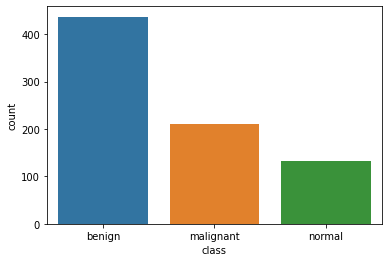

In [95]:
sns.countplot(x = 'class', data=csv_list)
csv_list.value_counts('class')

> benign :       0\
malignant :   1\
normal     :  2

In [96]:
csv_list['class'] = csv_list['class'].replace(['benign','malignant','normal'],['0','1','2'])
csv_list

,filename,class,image_path
0,benign/benign (1).png,0,/home/Sean/Project/iRail_US/Data/Dataset_BUSI_...
1,benign/benign (10).png,0,/home/Sean/Project/iRail_US/Data/Dataset_BUSI_...
2,benign/benign (100).png,0,/home/Sean/Project/iRail_US/Data/Dataset_BUSI_...
3,benign/benign (101).png,0,/home/Sean/Project/iRail_US/Data/Dataset_BUSI_...
4,benign/benign (102).png,0,/home/Sean/Project/iRail_US/Data/Dataset_BUSI_...
...,...,...,...
775,normal/normal (95).png,2,/home/Sean/Project/iRail_US/Data/Dataset_BUSI_...
776,normal/normal (96).png,2,/home/Sean/Project/iRail_US/Data/Dataset_BUSI_...
777,normal/normal (97).png,2,/home/Sean/Project/iRail_US/Data/Dataset_BUSI_...
778,normal/normal (98).png,2,/home/Sean/Project/iRail_US/Data/Dataset_BUSI_...


In [97]:
csv_list.to_csv("Busi_US.csv", index = False)

## 02 Data Load

In [98]:
import torch
import torch.nn as nn  # All neural network modules, nn.Linear, nn.Conv2d, BatchNorm, Loss functions
import torch.optim as optim  # For all Optimization algorithms, SGD, Adam, etc.
import torchvision.transforms as transforms  # Transformations we can perform on our dataset
import torchvision
import os
import pandas as pd
from skimage import io
from torch.utils.data import (
    Dataset,
    DataLoader,
) 

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"'{device}' is avilable.")

'cuda' is avilable.


In [122]:
from skimage import io

class BusiUSDataset(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.annotations = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, index):
        img_path = os.path.join(self.root_dir, self.annotations.iloc[index, 0])
        image = io.imread(img_path)
        y_label = torch.tensor(int(self.annotations.iloc[index, 1]))

        if self.transform:
            image = self.transform(image)

        return (image, y_label)

In [123]:
# Hyperparameters
in_channel = 3
num_classes = 2
learning_rate = 1e-3
batch_size = 32
num_epochs = 10

## 03 Std and Mean

In [182]:
transformations = transforms.Compose([transforms.ToPILImage(), 
                                      transforms.Resize((224, 224)), transforms.ToTensor(), 
                                      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [ ]:
transformations = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor()])

In [183]:
train_dataset = ImageFolder(img_path, transform = transformations)
train_loader = DataLoader(dataset = train_dataset, batch_size = 64, shuffle = True)

In [184]:
train_loader

In [185]:
def get_mean_std(loader):
    # Var[x] = E[x**2] - E[X]**2
    channels_sum, channels_squared_sum, num_batches = 0, 0, 0
    
    for data, _ in loader:
        channels_sum += torch.mean(data, dim=[0,2,3])
        channels_squared_sum += torch.mean(data**2, dim=[0,2,3])
        num_batches += 1
        
    mean = channels_sum/num_batches
    std = (channels_squared_sum/num_batches - mean**2)**0.5
    
    return mean, std

mean, std = get_mean_std(train_loader)
print(mean, std)

print(f" The mean value of the images : {mean},\n Standard Deviation values are : {std}")

tensor([0.3211, 0.3211, 0.3210]) tensor([0.2232, 0.2232, 0.2232])
 The mean value of the images : tensor([0.3211, 0.3211, 0.3210]),
 Standard Deviation values are : tensor([0.2232, 0.2232, 0.2232])


## Dataloader - After Normalization

>Because of the number of dataset isn't enough, and using pretrained weight of imagenet. \
I can use mean and std from ImageNet, or mean of (0.5, 0.5, 0.5) and std of (0.25, 0.25, 0.25).

In [197]:
transformations = transforms.Compose([transforms.ToPILImage(), 
                                      transforms.Resize((224, 224)), transforms.ToTensor(), 
                                      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [198]:
dataset = BusiUSDataset(
    csv_file="/home/Sean/Project/iRail_US/Busi_US.csv",
    root_dir="/home/Sean/Project/iRail_US/Data/Dataset_BUSI_with_GT",
    transform=transformations,
)

In [199]:
train_set, test_set = torch.utils.data.random_split(dataset, [700, 80])
train_loader = DataLoader(dataset=train_set, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_set, batch_size=batch_size, shuffle=True)

In [200]:
from torchvision.utils import make_grid

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(make_grid(images, nrow = 16).permute(1, 2, 0))
        break

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


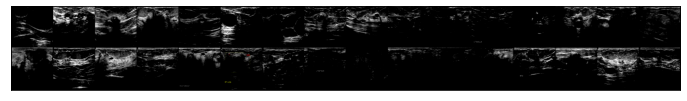

In [201]:
show_batch(train_loader)

In [202]:
# Model
model = torchvision.models.resnet50(pretrained=True)
model.to(device)
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [203]:
for epoch in range(num_epochs):
    losses = []

    for batch_idx, (data, targets) in enumerate(train_loader):
        data = data.to(device=device)
        targets = targets.to(device=device)

        scores = model(data)
        loss = criterion(scores, targets)
        losses.append(loss.item())

        optimizer.zero_grad()
        loss.backward()

        optimizer.step()

    print(f"Cost at epoch {epoch} is {sum(losses)/len(losses)}")

Cost at epoch 0 is 1.7385787151076577
Cost at epoch 1 is 0.4336666844107888
Cost at epoch 2 is 0.25508943471041595
Cost at epoch 3 is 0.2692535429854285
Cost at epoch 4 is 0.18853012404658578
Cost at epoch 5 is 0.19420975582166153
Cost at epoch 6 is 0.12644635648889976
Cost at epoch 7 is 0.10108491020615805
Cost at epoch 8 is 0.07512392675165426
Cost at epoch 9 is 0.04817428880646317


In [204]:
def check_accuracy(loader, model):
    num_correct = 0
    num_samples = 0
    model.eval()

    with torch.no_grad():
        for x, y in loader:
            x = x.to(device=device)
            y = y.to(device=device)

            scores = model(x)
            _, predictions = scores.max(1)
            num_correct += (predictions == y).sum()
            num_samples += predictions.size(0)

        print(f"Got {num_correct} / {num_samples} with accuracy {float(num_correct)/float(num_samples)*100:.2f}")

    model.train()

In [205]:
print("Checking accuracy on Training Set")
check_accuracy(train_loader, model)

print("Checking accuracy on Test Set")
check_accuracy(test_loader, model)

Checking accuracy on Training Set
Got 689 / 700 with accuracy 98.43
Checking accuracy on Test Set
Got 67 / 80 with accuracy 83.75


## Multilabel Classification

reference : https://towardsdatascience.com/multi-label-image-classification-with-neural-network-keras-ddc1ab1afede